# Multi Level Perceptron

### 1. Implement the multilayer perceptron, and train it to perform the logical functions NAND, NOR and XOR functions

In [2]:
import numpy as np

In [3]:
class mlp(object):
  def __init__(self, input_dim, hidden_dim, output_dim, epochs = 10000, lr = 1.0):
    self.W1 = np.random.random((input_dim, hidden_dim))
    self.W2 = np.random.random((hidden_dim, output_dim))
    self.epochs = epochs
    self.lr = lr

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, sx):
    return sx * (1 - sx)

  def cost(self, predicted, truth):
    return truth - predicted

  def fit(self, X, Y):
        for epoch_n in range(self.epochs):
            layer0 = X

            # forward propagation
            layer1 = self.sigmoid(np.dot(layer0, self.W1))
            layer2 = self.sigmoid(np.dot(layer1, self.W2))

            # back propagation (Y -> Layer2)
            layer2_error = self.cost(layer2, Y)
            layer2_delta = layer2_error * self.sigmoid_derivative(layer2)

            # back propagation (Layer2 -> Layer1)
            layer1_error = np.dot(layer2_delta, self.W2.T)
            layer1_delta = layer1_error * self.sigmoid_derivative(layer1)

            # update weights
            self.W2 += self.lr * np.dot(layer1.T, layer2_delta)
            self.W1 += self.lr * np.dot(layer0.T, layer1_delta)
        
  def predict(self, X, Y):
        p = []
        q = []
        for x, y in zip(X, Y):
            layer1_prediction = self.sigmoid(np.dot(self.W1.T, x))
            prediction = layer2_prediction = self.sigmoid(np.dot(self.W2.T, layer1_prediction))
            print(prediction, "\t", int(prediction > 0.5), "\t\t\t", y)
            p.append(prediction)
        return p
    
  def weights(self):
        print("W1 = ", self.W1)
        print("W2 = ", self.W2)

### XOR Gate

In [4]:
xor_input = np.array([
                [0, 0],
                [0, 1],
                [1, 0],
                [1, 1]
  ])
xor_output = np.array([[0, 1, 1, 0]]).T

X = xor_input
Y = xor_output

print("Multi Layer Perceptron for XOR Gate")
perceptron = mlp(input_dim = 2, hidden_dim = 5, output_dim = 1)
perceptron.fit(X, Y)
print("\nFitted Weights: ")
perceptron.weights()
print("\nModel's Prediction")
print("Output Value\tRounded Up Output\tExpected Value")
p = perceptron.predict(X, Y)

Multi Layer Perceptron for XOR Gate

Fitted Weights: 
W1 =  [[-3.93947577  2.01399178  5.66051551  4.0832231   5.21260846]
 [ 7.28554693 -1.73428714  5.56252742 -2.34707624 -2.83598134]]
W2 =  [[-10.99342415]
 [ -3.13654349]
 [ 16.21562146]
 [ -4.00181039]
 [ -5.34098409]]

Model's Prediction
Output Value	Rounded Up Output	Expected Value
[0.02586724] 	 0 			 [0]
[0.98290635] 	 1 			 [1]
[0.98082468] 	 1 			 [1]
[0.01121048] 	 0 			 [0]


### NAND Gate

In [5]:
nand_input = np.array([
                [0, 0],
                [0, 1],
                [1, 0],
                [1, 1]
  ])
nand_output = np.array([[1, 1, 1, 0]]).T

X = nand_input
Y = nand_output

print("Multi Layer Perceptron for NAND Gate")
perceptron = mlp(input_dim = 2, hidden_dim = 5, output_dim = 1)
perceptron.fit(X, Y)
print("\nFitted Weights: ")
perceptron.weights()
print("\nModel's Prediction")
print("Output Value\tRounded Up Output\tExpected Value")
p = perceptron.predict(X, Y)

Multi Layer Perceptron for NAND Gate

Fitted Weights: 
W1 =  [[ 2.10248748  0.98638331 -3.26869141 -0.83926049 -4.69944757]
 [-5.29968191  0.93659055  0.72758445  3.16810285  1.61175823]]
W2 =  [[ 8.01798638]
 [-1.90318768]
 [ 6.7175634 ]
 [-4.32903421]
 [ 7.01543002]]

Model's Prediction
Output Value	Rounded Up Output	Expected Value
[0.99957346] 	 1 			 [1]
[0.9925812] 	 1 			 [1]
[0.99152788] 	 1 			 [1]
[0.01105432] 	 0 			 [0]


### NOR Gate

In [6]:
nor_input = np.array([
                [0, 0],
                [0, 1],
                [1, 0],
                [1, 1]
  ])
nor_output = np.array([[1, 0, 0, 0]]).T

X = nor_input
Y = nor_output

print("Multi Layer Perceptron for XOR Gate")
perceptron = mlp(input_dim = 2, hidden_dim = 5, output_dim = 1)
perceptron.fit(X, Y)
print("\nFitted Weights: ")
perceptron.weights()
print("\nModel's Prediction")
print("Output Value\tRounded Up Output\tExpected Value")
p = perceptron.predict(X, Y)

Multi Layer Perceptron for XOR Gate

Fitted Weights: 
W1 =  [[ 2.54005526  1.51224321 -3.48644091  3.09247934 -1.57082563]
 [ 2.36652915  1.33540151 -3.53193519  3.00309797 -1.61998415]]
W2 =  [[-2.23187264]
 [-0.4114702 ]
 [10.75349657]
 [-3.66624392]
 [ 4.12741197]]

Model's Prediction
Output Value	Rounded Up Output	Expected Value
[0.98642237] 	 1 			 [1]
[0.0076024] 	 0 			 [0]
[0.00751554] 	 0 			 [0]
[0.00226096] 	 0 			 [0]


### 2. MLP Classification - Use any non-linearly separable dataset for classification 

### Method #1 

In [26]:
%cd "/home/mona/3074 ML Lab/Datasets"

/home/mona/3074 ML Lab/Datasets


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
def logistic(x):
    return 1.0/(1 + np.exp(-x))

def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

LR = 1   

I_dim = 4
H_dim = 5

epoch_count = 1000

In [36]:
#np.random.seed(1)
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)

preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

data = pd.read_csv('iris_data_numbers.csv')

In [37]:
training_data, validation_data, target_output, validation_output = train_test_split(np.array(data)[:, :-1], np.array(data)[:, -1], test_size = 0.20)

#training_data = np.asarray(training_data)
training_count = len(training_data[:,0])

#validation_data = np.asarray(validation_data)
validation_count = len(validation_data[:,0])

In [38]:
#training

for epoch in range(epoch_count):
    for sample in range(training_count):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(training_data[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])
            
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)
        
        FE = postActivation_O - target_output[sample]
        
        for H_node in range(H_dim):
            S_error = FE * logistic_deriv(preActivation_O)
            gradient_HtoO = S_error * postActivation_H[H_node]
                       
            for I_node in range(I_dim):
                input_value = training_data[sample, I_node]
                gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                
            weights_HtoO[H_node] -= LR * gradient_HtoO

In [39]:
#validation
            
correct_classification_count = 0
for sample in range(validation_count):
    for node in range(H_dim):
        preActivation_H[node] = np.dot(validation_data[sample,:], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])
            
    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)
        
    if postActivation_O > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == validation_output[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/validation_count)

Percentage of correct classifications:
26.666666666666668


### Method 2

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, epoch=10):
        self.learning_rate = learning_rate
        self.epoch = epoch

    def fit(self, X, y):
        self.weight = np.zeros(1 + X.shape[1])
        self.errors = []

        for i in range(self.epoch):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.learning_rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:] + self.weight[0])

    def predict(self, X):
        return np.where (self.net_input(X) >= 0.0, 1, -1)

In [73]:
df = pd.read_csv('iris_data.csv')

# get the values from the dataframe
df.iloc[145:150]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
# extracting the values from all the fourth column
y = df.iloc[:, 4].values
#y

In [75]:
y = np.where(y == "Iris-versicolor", -1, 1)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [77]:
X = df.iloc[:, [0, 2]].values

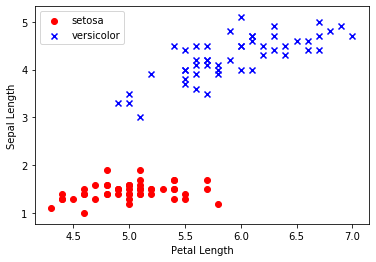

In [78]:
# plot
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.show()

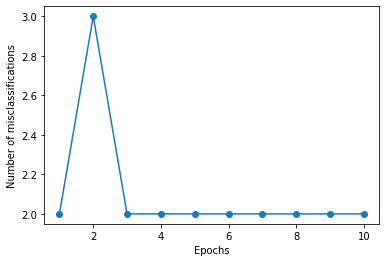

In [79]:
# confusion matrix

# create a mlp with learning rate and epoch
perceptron = Perceptron(0.1, 10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [80]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


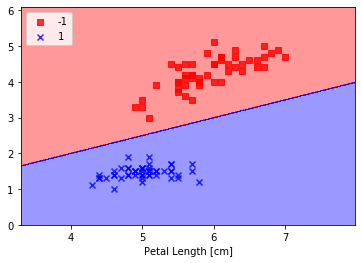

In [65]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('Sepal Length [cm]')
plt.xlabel('Petal Length [cm]')
plt.legend(loc="upper left")
plt.show()

### Method 3

In [85]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'seeds.csv'
dataset = load_csv(filename)
dataset = dataset[1: ]
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [92.3076923076923, 100.0, 100.0, 94.87179487179486, 94.87179487179486]
Mean Accuracy: 96.410%


# Spot
Implement multilayer perceptron Toy Popularity Prediction TaskUse the following training setdata

In [66]:
import numpy as np

In [88]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted, network = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores, network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions, network)

# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'shape_toys.csv'
dataset = load_csv(filename)
dataset = dataset[1: ]
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores , network = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [100.0, 60.0, 80.0, 100.0, 80.0]
Mean Accuracy: 84.000%


In [89]:
pred_values = [[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
               [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0] ]

for value in pred_values:
    print(predict(network, value))

1
1
